In [1]:
#Import Libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sgt import SGT
import os 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import math
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from keras.optimizers import Adam, SGD, RMSprop
from keras.metrics import binary_accuracy, Precision, Recall, AUC

from sklearn.metrics import confusion_matrix
import seaborn as sns

2023-02-26 20:16:03.475886: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 20:16:03.974761: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-26 20:16:03.974804: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-26 20:16:03.974810: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
#Read Corpus
path = '../TOP_CON/Healthy/'
folder_names = os.listdir(path)

def load_files(folder_names, path):
    l = []
    for folder in folder_names: 
        p = path + folder + '/'
        p_os = os.listdir(p)
        for filename in p_os:
            if filename!='.ipynb_checkpoints': 
                new_path = p + filename 
                x = pd.read_csv(new_path)
                l.append(x)
    return l
corpus_healthy = load_files(folder_names, path)

path = '../TOP_CON/Glaucoma/'
folder_names = os.listdir(path)

corpus_diseased = load_files(folder_names, path)



In [3]:
def cat_encode(x,y):
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.6 > i and 0<j and 0.6 > j: 
            arr.append('A')
        elif 0<i and 0.25 > i and 0.6<j and 1 > j: 
            arr.append('B')
        elif 0.25<i and 0.48 > i and 0.6<j and 1 > j: 
            arr.append('C')
        elif 0.48<i and 0.6 > i and 0.6<j and 1 > j: 
            arr.append('D')
        elif 0.6<i and 1 > i and 0<j and 0.6 > j: 
            arr.append('E')
        elif 0.6<i and 0.77 > i and 0.6<j and 1 > j: 
            arr.append('F')
        elif 0.77<i and 1 > i and 0.6<j and 1 > j: 
            arr.append('G')
        else: 
            arr.append('error')

    return arr
    
def make_corpus(corpus_new):
    A = np.array(corpus_new.fixation_id[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id[corpus_new.letters=='F'])
    G = np.array(corpus_new.fixation_id[corpus_new.letters=='G'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F],
                           [7, G]], columns=['id', 'sequence'])
    return corpus

l = []
for i in corpus_healthy: 
    arr = cat_encode(i.norm_pos_x, i.norm_pos_y)
    
    i['letters'] = arr
    i_new = i[['letters', 'fixation_id']]
    i_new = make_corpus(i_new)
    l.append(i_new)
    
for i in corpus_diseased: 
    arr = cat_encode(i.norm_pos_x, i.norm_pos_y)
    i['letters'] = arr
    i_new = i[['letters', 'fixation_id']]
    i_new = make_corpus(i_new)
    l.append(i_new)
    


In [4]:
e = []
for i in l: 
    sgt_ = SGT(kappa=1, 
               lengthsensitive=False, 
               mode='multiprocessing')
    sgtembedding_df = sgt_.fit_transform(i)
    sgtembedding_df = sgtembedding_df.set_index('id')
    e.append(sgtembedding_df)
    

print(len(e))
print(e[0])

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

In [5]:
df1 = pd.DataFrame()
for i in e: 
    pca = PCA(n_components=2)
    pca.fit(i)
    X=pca.transform(i)
    df = pd.DataFrame(data=X, columns=['x1', 'x2'])
    df_new = pd.DataFrame([[df.iloc[0,0], df.iloc[0,1], 
                   df.iloc[1,0], df.iloc[1,1], 
                   df.iloc[2,0], df.iloc[2,1], 
                  df.iloc[3,0], df.iloc[3,1], 
                  df.iloc[4,0], df.iloc[4,1], 
                   df.iloc[5,0], df.iloc[5,1], 
                  df.iloc[6,0], df.iloc[6,1]]], 
                 columns = ['0x1', '0x2', '1x1', '1x2', '2x1', '2x2', '3x1', '3x2', '4x1', '4x2', '5x1', '5x3', '6x1', '6x2'])
    df1 = pd.concat([df1, df_new])
df1 = df1.reset_index().drop(["index"], axis = 1)
labels = [1]*80 + [0]*80

df1['labels'] = labels
df1

,0x1,0x2,1x1,1x2,2x1,2x2,3x1,3x2,4x1,4x2,5x1,5x3,6x1,6x2,labels
0,0.958814,0.002904,-0.157562,-0.048826,-0.157562,-0.048826,-0.157562,-0.048826,-0.157562,-0.048826,-0.157562,-0.048826,-0.171003,0.241227,1
1,0.492505,0.013559,-0.076684,-0.050352,-0.076684,-0.050352,-0.076684,-0.050352,-0.076684,-0.050352,-0.109084,0.238200,-0.076684,-0.050352,1
2,1.040909,0.045676,-0.152488,-0.110288,-0.152488,-0.110288,-0.177155,-0.188429,-0.253801,0.583907,-0.152488,-0.110288,-0.152488,-0.110288,1
3,0.583557,0.007808,-0.083858,-0.024879,-0.083858,-0.024879,-0.083858,-0.024879,-0.119260,0.287432,-0.106362,-0.110301,-0.106362,-0.110301,1
4,0.398856,0.211806,-0.013757,-0.075144,-0.013757,-0.075144,-0.013757,-0.075144,-0.026890,-0.208519,-0.316938,0.297288,-0.013757,-0.075144,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1.054057,0.001520,-0.169547,-0.016370,-0.169547,-0.016370,-0.189305,0.281765,-0.186566,-0.217804,-0.169547,-0.016370,-0.169547,-0.016370,0
156,0.687810,-0.021888,-0.116309,0.004327,-0.147840,-0.238143,-0.116309,0.004327,-0.074732,0.242721,-0.116309,0.004327,-0.116309,0.004327,0
157,0.313248,0.055010,-0.037692,-0.055334,-0.037692,-0.055334,-0.037692,-0.055334,-0.124787,0.221661,-0.037692,-0.055334,-0.037692,-0.055334,0
158,1.261763,0.311580,-0.157908,-0.316158,-0.182191,-0.378833,-0.121104,-0.229561,-0.549556,1.091942,-0.129901,-0.249410,-0.121104,-0.229561,0


In [7]:
# df1 = df1.sample(frac=1)
labels = df1.labels
df_new = df1.drop(['labels'], axis =1 )
col = df_new.columns
mm = MinMaxScaler()
df_new = mm.fit_transform(df_new)
df_new = df_new*100


# train = df_new[0:120]
# train_labels = np.array(labels[0:120])

# test = df_new[120:]
# test_labels = np.array(labels[120:])

X_train, X_test, y_train, y_test = train_test_split(df_new, labels, test_size=0.2, random_state=42)



In [15]:
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes-first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    return layers

FindLayerNodesLinear(5, 200, 50)

[200, 163, 125, 88, 50]

In [9]:
def createmodel(n_layers, first_layer_nodes, activation_func, loss_func, last_layer_nodes):
    model = Sequential()
    print(n_layers, first_layer_nodes, last_layer_nodes)
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation_func))
            
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='sgd', loss=loss_func, metrics = ["accuracy"]) 
    
    return model

model =  KerasClassifier(build_fn=createmodel, verbose = False)  


/tmp/ipykernel_2300762/2104444513.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model =  KerasClassifier(build_fn=createmodel, verbose = False)


In [10]:
activation_funcs = ['relu', 'tanh'] 
loss_funcs = ['binary_crossentropy']
param_grid = dict(n_layers=np.arange(2,10), first_layer_nodes = [200,300],activation_func = activation_funcs, loss_func = loss_funcs, last_layer_nodes= [40,50,60,70,80,90,100], batch_size = [40], epochs = [5])
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1)


In [13]:
grid.fit(X_train,y_train)

2023-02-26 20:18:52.671986: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 20:18:52.676806: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 20:18:52.676807: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

2023-02-26 20:18:52.898458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 20:18:52.920441: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 20:18:52.933338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

2023-02-26 20:18:53.677671: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-26 20:18:53.677895: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-26 20:18:53.677917: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-02-26 20:18:53.691111: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory


2023-02-26 20:18:54.403117: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 20:18:54.403443: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 20:18:54.440209: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-26 20:18:54.440331: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to do

2023-02-26 20:18:54.605813: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 20:18:54.607075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 20:18:54.607572: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 20:18:54.611357: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 20:18:54.612114: I tensorflow/compiler/xla/stream_executo

2023-02-26 20:19:31.996154: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 20:19:31.996369: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 20:19:32.022488: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-26 20:19:32.022513: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to do

5 200 50


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc830659180>,
             n_jobs=-1,
             param_grid={'activation_func': ['relu', 'tanh'],
                         'batch_size': [40], 'epochs': [5],
                         'first_layer_nodes': [200, 300],
                         'last_layer_nodes': [40, 50, 60, 70, 80, 90, 100],
                         'loss_func': ['binary_crossentropy'],
                         'n_layers': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [14]:
print(grid.best_score_)
print(grid.best_params_)

0.6086153864860535
{'activation_func': 'tanh', 'batch_size': 40, 'epochs': 5, 'first_layer_nodes': 200, 'last_layer_nodes': 50, 'loss_func': 'binary_crossentropy', 'n_layers': 5}


In [16]:

model = Sequential()
model.add(Dense(200, input_shape=(14,), activation='relu'))
model.add(Dense(163, input_shape=(14,), activation='relu'))
model.add(Dense(125, input_shape=(14,), activation='relu'))
model.add(Dense(88, input_shape=(14,), activation='relu'))
model.add(Dense(50, input_shape=(14,), activation='relu'))
# model.add(Dense(75, input_shape=(14,), activation='relu'))
# model.add(Dense(70, input_shape=(14,), activation='relu'))
# model.add(Dense(65, input_shape=(14,), activation='relu'))
# model.add(Dense(70, input_shape=(14,), activation='relu'))
# model.add(Dense(55, input_shape=(14,), activation='relu'))
# model.add(Dense(50, input_shape=(14,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [17]:
optimizers = ['adam', 'sgd', 'rmsprop']
metrics = ['accuracy', Recall(), AUC()]
best_loss = float('inf')
best_optimizer = None
best_metric = None
# Compile the model with each optimizer and metric
for optimizer in optimizers:
    for metric in metrics:
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=metric)
        
        # Train and evaluate the model
        history = model.fit(X_train, y_train, epochs=5, batch_size=40)
        val_loss, val_metric = model.evaluate(X_test, y_test)
        
        # Print the validation loss and metric
#         print('Optimizer: {}, Metric: {}, Validation Loss: {:.4f}, Validation Metric: {:.4f}'.format(optimizer, metric, val_loss, val_metric))
        if val_loss < best_loss: 
            best_loss = val_loss
            best_optimizer = optimizer
            best_metric = metric
print(best_loss)
print(best_optimizer)
print(best_metric)
        







Epoch 1/5
4/4 [==============================] - 1s 2ms/step - loss: 2.0499 - accuracy: 0.5000
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 0.8451 - accuracy: 0.5469
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7537 - accuracy: 0.5625
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7462 - accuracy: 0.6328
Epoch 5/5
1/1 [==============================] - 0s 87ms/step - loss: 0.9024 - accuracy: 0.5000
Epoch 1/5
4/4 [==============================] - 1s 3ms/step - loss: 1.1009 - recall: 0.6250
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7540 - recall: 0.3906
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7205 - recall: 0.6250
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.6729 - recall: 0.3281
Epoch 5/5
1/1 [==============================] - 0s 88ms/step - loss: 0.7510 - recall: 0.1250
Epoch 1/5
4/4 [==============================] - 1s 3ms/st

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=Recall())


In [39]:
h = model.fit(
  X_train, # training data
  y_train, # training targets
  epochs=5,
  batch_size=40,
)


Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 0.2895 - recall_1: 0.8750
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 0.2832 - recall_1: 0.9062
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 0.2687 - recall_1: 0.9688
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.2612 - recall_1: 0.8594
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.2534 - recall_1: 0.9688


In [46]:
y_pred = model.predict(X_test)

rounded = [int(round(x[0])) for x in y_pred]
from sklearn.metrics import accuracy_score
a = accuracy_score(rounded,y_test)
print('Accuracy is:', a*100)

1/1 [==============================] - 0s 11ms/step
Accuracy is: 56.25


1/1 [==============================] - 0s 11ms/step


/tmp/ipykernel_2300762/3347757405.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col, rotation=90)


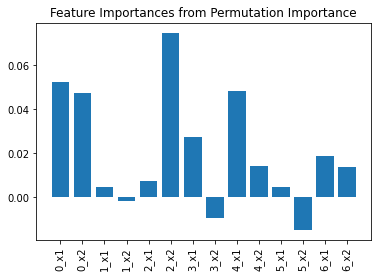

In [47]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')

# print feature importances
fig, ax = plt.subplots()
col = ['0_x1', '0_x2', '1_x1', '1_x2','2_x1', '2_x2','3_x1', '3_x2','4_x1', '4_x2','5_x1', '5_x2','6_x1', '6_x2',]
ax.bar(col, result.importances_mean)
ax.set_xticklabels(col, rotation=90)
ax.set_title('Feature Importances from Permutation Importance')
plt.show()


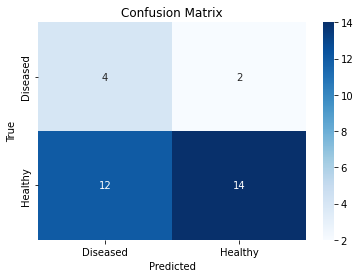

In [48]:
cm = confusion_matrix(rounded, y_test)
labels = ['Diseased', 'Healthy']

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

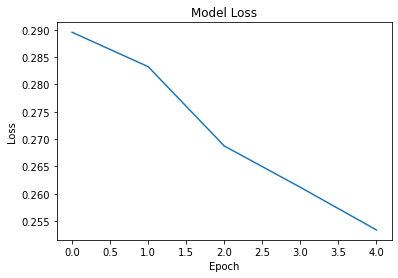

In [49]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [50]:
print(y_train.value_counts())
print(y_test.value_counts())

1    64
0    64
Name: labels, dtype: int64
0    16
1    16
Name: labels, dtype: int64


In [ ]:
#SMOTE

In [158]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={1: 1000, 0: 1000})

# Fit SMOTE on X and y
smote.fit(X_train, y_train)

# Generate synthetic samples
n_synthetic_samples = 1000
X_synthetic, y_synthetic = smote.fit_resample(X_train, y_train)

# Concatenate original and synthetic data
X_new = np.concatenate((X_train, X_synthetic))
y_new = np.concatenate((y_train, y_synthetic))


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 64)
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 64)
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 64)
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 

(2128,)